# import libraries

In [14]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dataset from tensor in memory

In [15]:
t1=tf.constant([
    [1,2,3],
    [4,5,6],
    [7,8,9]
],dtype=tf.float32)
ds1=tf.data.Dataset.from_tensors(t1)
ds2=tf.data.Dataset.from_tensor_slices(t1)
for element in ds1:
    print(element)
for element in ds2:
    print(element)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


# Data from numpy array

In [21]:
train,test=tf.keras.datasets.fashion_mnist.load_data()
images,labels=train
images=images/255
type(images),type(labels)
dataset=tf.data.Dataset.from_tensor_slices((images,labels))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

# Textline dataset

In [22]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name) # download each file using tf.keras.get_file
    for file_name in file_names
]

# Creating and viewing the dataset

In [23]:
text_line_dataset=tf.data.TextLineDataset(file_paths)
for line in text_line_dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


# Text dataset from folder

In [24]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    origin=data_url,
    untar=True, # data set is a tar.gz file so untar is used to uncompress the dataset
    cache_dir= "stack_overflow",
    cache_subdir = ""
)
print(dataset_dir)
dataset_dir = pathlib.Path(dataset_dir).parent
train_dir = dataset_dir/'train'
train_dir

/tmp\.keras\stack_overflow_16k


WindowsPath('/tmp/.keras/train')

In [25]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


# CSV dataset

In [26]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [27]:
df = pd.read_csv(titanic_file)
titanic_dataset = tf.data.Dataset.from_tensor_slices(dict(df))
     

for feature_batch in titanic_dataset.take(1):
    for key,value in feature_batch.items():
        print("  {!r:20s}: {}".format(key,value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


# Loading CSV using tf.data.experimental.make_csv_dataset

In [28]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, 
    batch_size=4,# Setting the batch size
    label_name="survived", # selecting the label column
    select_columns=['class', 'fare', 'survived']
)

     

for feature_batch, label_batch in titanic_batches.take(1):
    print(f"Survived: {label_batch}")
    for key,value in feature_batch.items():
        print(f"{key:20s}: {value}")

Survived: [0 0 1 0]
fare                : [ 7.05  10.5    7.775 16.1  ]
class               : [b'Third' b'Second' b'Third' b'Third']


# Loading CSV using tf.data.experimental.CSV dataset

In [29]:
titanic_types  = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string] 
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types , header=True)

for line in dataset.take(10):
  print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


# Dataset from sets of files

In [30]:

flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)
flowers_root = pathlib.Path(flowers_root)

# Creating the dataset from files

In [31]:
for item in flowers_root.glob("*"):
    print(item)

C:\Users\GFLAB\.keras\datasets\flower_photos\daisy
C:\Users\GFLAB\.keras\datasets\flower_photos\dandelion
C:\Users\GFLAB\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\GFLAB\.keras\datasets\flower_photos\roses
C:\Users\GFLAB\.keras\datasets\flower_photos\sunflowers
C:\Users\GFLAB\.keras\datasets\flower_photos\tulips


In [32]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
     

def process_path(file_path):
    # folder name or label will be the second last value
    # when seperated using tf.strings.split with os.sep as seperator
    label = tf.strings.split(file_path,os.sep)[-2] 
    return tf.io.read_file(file_path),label
     

labeled_ds = file_path_ds.map(process_path)
     

for image_raw, label in labeled_ds.take(1):
    print(image_raw,label,sep="\n")

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x00\xf0\x00\xb4\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x02\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x06\x07\x05\x08\x03\x04\t\x02\x01\x00\n\xff\xc4\x00D\x10\x00\x01\x03\x02\x04\x04\x04\x04\x03\x06\x05\x02\x05\x05\x01\x00\x01\x02\x03\x04\x05\x11\x00\x06\x12!\x07\x131A\x08"Qa\x142q\x81#B\x91\t\x15R\xa1\xb1\xc1$3br\xd1\x16\xf0\x17c\

# Batching datasets

In [33]:
# sample datasets
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset)) # joining both inc and dec

# batching the dataset
batched_dataset = dataset.batch(4) # try with a different batch size

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3], dtype=int64), array([ 0, -1, -2, -3], dtype=int64)]
[array([4, 5, 6, 7], dtype=int64), array([-4, -5, -6, -7], dtype=int64)]
[array([ 8,  9, 10, 11], dtype=int64), array([ -8,  -9, -10, -11], dtype=int64)]
[array([12, 13, 14, 15], dtype=int64), array([-12, -13, -14, -15], dtype=int64)]


In [34]:
batched_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [35]:
dataset.batch(4,drop_remainder = True)

<_BatchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.int64, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>

# Padded batching

In [36]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
padded_batch_dataset = dataset.padded_batch(4, padded_shapes=(None,)) # (None,) uses the largest size as padding

for batch in padded_batch_dataset.take(2):
  print(batch.numpy())
  print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



# Shuffled dataset

In [37]:
dataset = tf.data.TextLineDataset(titanic_file)
dataset.shuffle(buffer_size=10)

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

# Preprocessing data

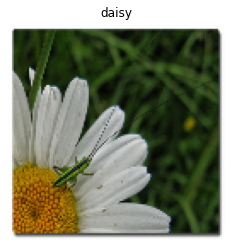

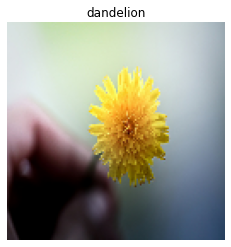

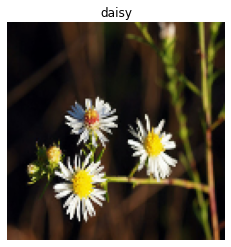

In [39]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
     

def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label
     

image_ds = file_path_ds.map(parse_image)
     

def show(image,label):
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis("off")
    plt.show()
     

for image,label in image_ds.take(3):
    show(image,label)

# Using tf.data with tf.keras

In [40]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

# Creating the dataset and the model

In [41]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# Fitting the model

In [42]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 811us/step - loss: 0.6076 - accuracy: 0.7939
Epoch 2/2
1875/1875 [==============================] - 2s 866us/step - loss: 0.4630 - accuracy: 0.8409


# Evaluating the model

In [43]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1875/1875 [==============================] - 1s 722us/step - loss: 0.4371 - accuracy: 0.8496
Loss : 0.4370589852333069
Accuracy : 0.8496000170707703


# Using the model to predict

In [44]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32) # creating a dataset with only images
result = model.predict(predict_ds, steps = 10)
print(result.shape)

10/10 [==============================] - 0s 770us/step
(320, 10)
